In [1]:
import torch
import torchvision
import torch.nn as nn   
import numpy as np
import torchvision.transforms as transforms 

In [2]:
# path for files

train_root = r"C:\Desktop\datasets\monumentss-image-classification\train"
test_root = r"C:\Desktop\datasets\monumentss-image-classification\test"
train_path_dict = {}
test_path_dict = {}

In [3]:
# loop over files and store in folders

import os 

for subdir , dirs, files in os.walk(train_root):
    wonder = os.path.basename(subdir)
    paths = []
    for file in files:
        paths.append(os.path.join(subdir, file))
    if wonder != "train":
        train_path_dict[wonder] = paths
        
        
# go through test folders

for subdir, dirs, files in os.walk(test_root):
    wonder = os.path.basename(subdir)
    paths = []
    for file in files:
        paths.append(os.path.join(subdir, file))
        
    if wonder != "test":
        test_path_dict[wonder] = paths 
        
        
        
test_path_dict 

{'chichen_itza': ['C:\\Desktop\\datasets\\monumentss-image-classification\\test\\chichen_itza\\chichen-itza-683193_1280.jpg',
  'C:\\Desktop\\datasets\\monumentss-image-classification\\test\\chichen_itza\\pyramid-1093924_1280.jpg'],
 'christ_the_redeemer_rio': ['C:\\Desktop\\datasets\\monumentss-image-classification\\test\\christ_the_redeemer_rio\\pexels-photo-2818895.jpeg',
  'C:\\Desktop\\datasets\\monumentss-image-classification\\test\\christ_the_redeemer_rio\\pexels-photo-2868248.jpeg'],
 'city_of_petra': ['C:\\Desktop\\datasets\\monumentss-image-classification\\test\\city_of_petra\\petra-2067946_1280.jpg',
  'C:\\Desktop\\datasets\\monumentss-image-classification\\test\\city_of_petra\\petra-jordan-543450_1280.jpg'],
 'colosseum_rome': ['C:\\Desktop\\datasets\\monumentss-image-classification\\test\\colosseum_rome\\colosseum-3676165_1280.jpg',
  'C:\\Desktop\\datasets\\monumentss-image-classification\\test\\colosseum_rome\\italy-2478805_1280.jpg'],
 'great_pyramid_of_giza': ['C:\\De

- randomly select images from different folders and display them in grid
- some images may appear twice 

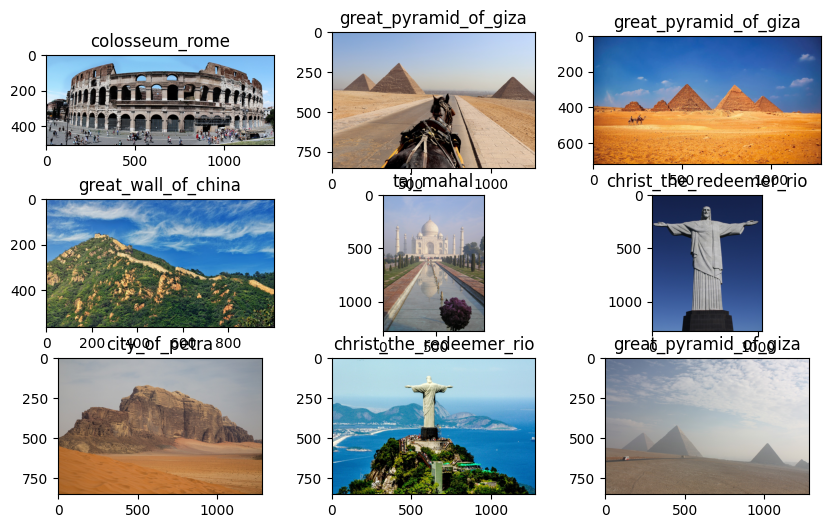

In [4]:
import matplotlib.pyplot as plt
import random

num_images_per_axis = 3
fig_size = (10,6)
figure = plt.figure(figsize=fig_size)

for i in range(num_images_per_axis**2):
    ax = figure.add_subplot(num_images_per_axis, num_images_per_axis, i+1)
    
    # randomly select wonder
    wonder_type = random.choice(list(train_path_dict.keys()))
    ax.title.set_text(wonder_type)
    
    # select random file index 
    index = random.choice(range(0,7))
    img = plt.imread(train_path_dict[wonder_type][index])
    ax.imshow(img)

In [5]:
# rgb images 3 channels (width, height, channels)
# img sizes different so we need to adjust it 
# 8 train images per label ; 2 test imgs per label

# dataset class of pytorch mehods len , init, get_item etc used to index data at central place 
# imagefolder 'll create dataset for us , automatically class label 

![Screenshot 2025-07-31 120603.png](<attachment:Screenshot 2025-07-31 120603.png>)
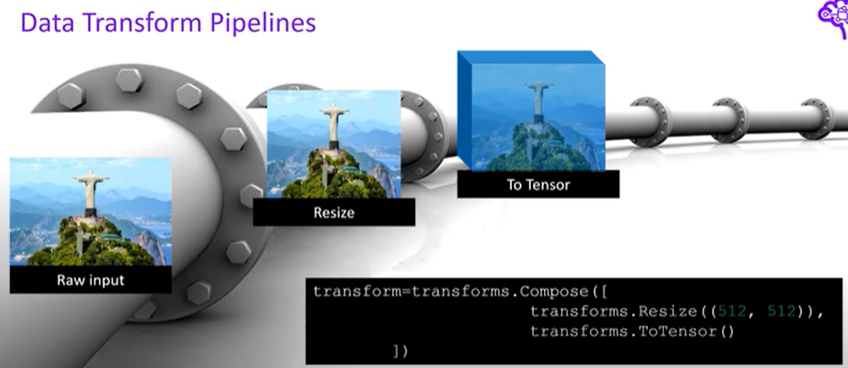

In [6]:
# load train dataset


transform = transforms.Compose([
    transforms.Resize((512,512)),
    transforms.ToTensor(),
])

training_data = torchvision.datasets.ImageFolder(
    root = train_root,  # folder containg img folders
    transform = transform
)

test_data = torchvision.datasets.ImageFolder(
    root = test_root,
    transform = transform,
)

In [7]:
print(training_data)
print(training_data[0])

Dataset ImageFolder
    Number of datapoints: 64
    Root location: C:\Desktop\datasets\monumentss-image-classification\train
    StandardTransform
Transform: Compose(
               Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
(tensor([[[0.6510, 0.6549, 0.6549,  ..., 0.6863, 0.6824, 0.6784],
         [0.6510, 0.6510, 0.6549,  ..., 0.6863, 0.6863, 0.6824],
         [0.6471, 0.6510, 0.6510,  ..., 0.6863, 0.6863, 0.6824],
         ...,
         [0.4000, 0.4157, 0.3961,  ..., 0.3765, 0.3843, 0.4353],
         [0.4039, 0.4235, 0.4039,  ..., 0.3412, 0.3725, 0.4353],
         [0.3882, 0.4196, 0.4039,  ..., 0.3020, 0.3373, 0.3882]],

        [[0.6392, 0.6431, 0.6431,  ..., 0.6980, 0.6941, 0.6902],
         [0.6392, 0.6392, 0.6431,  ..., 0.6980, 0.6980, 0.6941],
         [0.6353, 0.6392, 0.6392,  ..., 0.6980, 0.6980, 0.6941],
         ...,
         [0.4706, 0.4863, 0.4667,  ..., 0.4471, 0.4510, 0.5020],
         [0.4745, 

In [8]:
print(test_data)
print(test_data[0])

Dataset ImageFolder
    Number of datapoints: 16
    Root location: C:\Desktop\datasets\monumentss-image-classification\test
    StandardTransform
Transform: Compose(
               Resize(size=(512, 512), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
(tensor([[[0.5451, 0.5412, 0.5373,  ..., 0.3843, 0.3843, 0.3843],
         [0.5373, 0.5333, 0.5333,  ..., 0.3843, 0.3882, 0.3882],
         [0.5333, 0.5294, 0.5333,  ..., 0.3843, 0.3882, 0.3922],
         ...,
         [0.4196, 0.4627, 0.4745,  ..., 0.4784, 0.4471, 0.4471],
         [0.4235, 0.4196, 0.4314,  ..., 0.4863, 0.5020, 0.5098],
         [0.4824, 0.4471, 0.4235,  ..., 0.4431, 0.4706, 0.4667]],

        [[0.6392, 0.6353, 0.6314,  ..., 0.5216, 0.5216, 0.5216],
         [0.6314, 0.6275, 0.6275,  ..., 0.5216, 0.5255, 0.5255],
         [0.6275, 0.6235, 0.6235,  ..., 0.5216, 0.5255, 0.5294],
         ...,
         [0.4118, 0.4549, 0.4627,  ..., 0.4667, 0.4353, 0.4353],
         [0.4157, 0

In [9]:
# data loader efficiently loads data & improves performance of optimizer 
# for eg. 5mb * 1000 imgs = 5 GB memory required 
# uses SGD behind  : converges faster to min in our loss functions 
# load batches (typical 32 samples per batch)
# shuffle, parallize data loading , cache preprocess data

  

In [10]:
batch_size = 8

# create dataloaders

train_loader = torch.utils.data.DataLoader(
    training_data,
    batch_size=batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=True,
)

In [11]:
'''
Conv1 

Input shape: (batch_size, 3, 128, 128) → RGB image
output shape: (batch_size, 5, 128, 128)  

conv2

Input: (batch_size, 5, 128, 128)
Output: (batch_size, 10, 128, 128)

layer 3 pool 
Halves spatial dimensions
Output: (batch_size, 10, 64, 64)

conv4

Input: (batch_size, 10, 64, 64)
Output: (bacth_size, 20, 64,64)

conv5

Input: (bacth_size, 20, 64,64)
Output: (batch_size, 30, 64, 64)

layer 6 pool

Input: (batch_size, 30, 64, 64)
Output: (batch_size, 30, 32, 32)


Flatten Layer

Input: (batch_size, 30, 32, 32)
Flattened: (batch_size, 30*32*32) = (batch_size, 30,720)


'''

'\nConv1 \n\nInput shape: (batch_size, 3, 128, 128) → RGB image\noutput shape: (batch_size, 5, 128, 128)  \n\nconv2\n\nInput: (batch_size, 5, 128, 128)\nOutput: (batch_size, 10, 128, 128)\n\nlayer 3 pool \nHalves spatial dimensions\nOutput: (batch_size, 10, 64, 64)\n\nconv4\n\nInput: (batch_size, 10, 64, 64)\nOutput: (bacth_size, 20, 64,64)\n\nconv5\n\nInput: (bacth_size, 20, 64,64)\nOutput: (batch_size, 30, 64, 64)\n\nlayer 6 pool\n\nInput: (batch_size, 30, 64, 64)\nOutput: (batch_size, 30, 32, 32)\n\n\nFlatten Layer\n\nInput: (batch_size, 30, 32, 32)\nFlattened: (batch_size, 30*32*32) = (batch_size, 30,720)\n\n\n'

In [12]:
import torch.nn as nn
import torch.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        #architecture 
        # conv2d coz we have 2d inpput image 
        # linear = fully conncted / dense 
        self.conv1= nn.Conv2d(in_channels=3, out_channels=5, kernel_size =3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels = 20, kernel_size=5, padding= 2)
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # classifier, i/p = 30 feature maps with 128 x 128
        self.fc1 = nn.Linear(30 * 128 *128 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 8)
        
    def forward(self, x):
        
        # feature extraction
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        
        # flatten 
        x = x.flatten(start_dim =1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 
        

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
net = CNN()
net = net.to(device)

CNN with SEQUENTIAL

In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=20, out_channels=30,kernel_size=2),
            nn.ReLU(inplace=True)
        )
        self.classifier =nn.Sequential(
            nn.Linear(30 * 126 * 126,120),
            nn.Linear(120,84),
            nn.Linear(84,4)
        )
        
    def forward(self,x):
        x =self.cnn(x)
        x = self.classifier(x)
        return x

In [18]:
import torch.optim as optim 
cross_entropy_loss= nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr =0.0001)

In [21]:
def train_model(early_stopping=True,epochs=50):
    
    epoch_train_losses = []
    epoch_test_losses = []
    current_best_loss = np.inf 
    early_stopping_counter = 0 
    early_stopping_patience = 3
    
    for epoch in range(epochs):
        for i , batch in enumerate(train_loader, 0):
            input, labels = batch 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss = cross_entropy_loss(outputs, labels)
            loss.backward()
            optimizer.step()
            
        if epoch % 1 == 0:
            outputs = outputs_to_label(outputs)
            
            train_acc = calculate_accuracy(labels.detach().cpu().numpy(), outputs)
            test_acc, test_loss = test()
            print(f"Epoch: {epoch} | train_loss: {loss} | train_acc: {train_acc} \ | test_loss: {test_loss} | test_acc: {test_acc}")
            epoch_train_losses.append(loss.item())
            epoch_test_losses.append(test_loss)
            
            if test_loss < current_best_loss:
                current_best_loss = test_loss
                early_stopping_counter = 0;
            else:
                early_stopping_counter +=1
                if early_stopping_counter >= early_stopping_patience and early_stopping:
                    break
                
    print("Finished Training ")
    return epoch_train_losses, epoch_test_losses
    
    
def calculate_accuracy(labels, predictions):
    labels = np.array(labels)
    predictions = np.array(predictions)
    return correct.sum() / correct.size


def test():
    all_labels = []
    all_predictions = []
    all_losses = []
    
    for i, batch in enumerate(test_loader,0):
        inputs =inputs.to(device)
        labels = labels.to(device)                     
        inputs,labels = batch 
        
        
        outputs = net(inputs)
        
        loss = cross_entropy_loss(outputs, labels)
        all_losses.append(loss.item())
        
        outputs= outputs.to_label(outputs)
        
        all_labels.extend(label.detach().cpu().numpy())
        all_predictions.extend(outputs)
        
    test_acc = calculate_accuracy(all_labels, all_predictions)
    return test_acc, sum(all_losses)/ len(test_loader)



def output_to_label(output):
    # apply softmax
    output_probs = F.softmax(output)
    return np.argmax(outputs_probs.detach().cpu().numpy(),axis=1)
        

In [22]:
epoch_train_losses, epoch_test_losses = train_model()

UnboundLocalError: local variable 'inputs' referenced before assignment

Visualizing Training

In [ ]:
import seaborn as sns
sns.let_style("darkgrid")
import pandas as pd

def visualize_losses():
    losses_tr = pd.DataFrame(columns=["loss_val", "type"])
    losses_tr["loss_val"] = epoch_train_losses 
    losses_tr["type"] = "train"
    losses_ts = pd.DataFrame(columns=["loss_val","type"])
    losses_ts["loss_val"] = epoch_test_losses
    losses_ts["type"] = "test"
    all_losses = pd.concat([losses_tr,losses_ts])
    sns.lineplot(data=all_losses, x=all_losses.index, y="loss_val", hue="type")
    plt.show()
    

In [ ]:
visualize_losses()

In [ ]:
import numpy as np

dataiter = iter(test_loader)
images,labels = dataiter.next()
images = images.to(device)

outputs = net(images)
labels = np.array(labels)

# cross entropy loss already softmax , now manually 
outputs_prob = F.softmax(outputs).detach().cpu().numpy()

# get most likely class 
outputs = np.argmax(outputs_prob, axis=1)
probabilities = np.max(outputs_prob, axis =1)

# class probs, predictions , ground_truths 
print(outputs_prob)
print(outputs)
print(labels)

# mapping numeric values to classes  

txt_label = list(train_dataset.class_to_idx.keys())
outputs = [txt_labels[i] for i in outputs]
labels = [txt_labels[i] for i in labels]


In [ ]:
sns.set_style("white")
figsize = (10,6)
figure = plt.figure(figsize=figsize)

for i in range(batch_size):
    ax = figure.add_subplot(num_images_per_axis, num_images_per_axis , i+1)
    wonder_type = outputs[i]
    groundtruth = labels[i]
    if groundtruth == wonder_type:
        color = "green"
    else:
        color = "red"
    img = images[i]
    img = img.permute(1,2,0).detach().cpu().numpy()
    ax.set_title(wonder_type + f"{probabilities[i]:.2f}%", color=color)
    ax.imshow(img)